<b>1</b> OBTENCIÓN DE DATOS

In [11]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> pre PROCESAMIENTO DE DATA

In [12]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data,True)

373


3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

GRAFICAS ENTRE VARIABLES

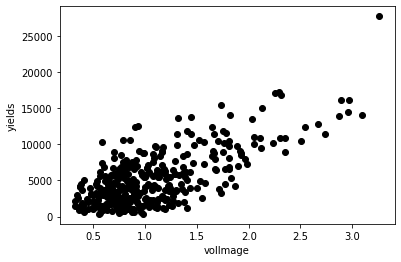

In [13]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataframe["volImage"],dataframe["yields"],c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("yields")

pyplot.show()

SE CALCULA LA VARIABLE EL IAF
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

Diametro

$diameter = 2*\sqrt(\frac{area}{\pi})$

In [14]:

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)


<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


In [15]:

IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"latArea":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)
pd.options.display.float_format = '{:,.2f}'.format
dataFrameCorrs=dframeFinal.loc[:,["yields","volImage","criMax","IAF_AREA","hImage","tviMin","ndviMax","cgreenviMax"]]
dfCors= dataFrameCorrs.corr(method="pearson")
dfCors.round(decimals=3)
print(dfCors)
dfCors.to_latex("CorrelationsTab.tex")

             yields  volImage  criMax  IAF_AREA  hImage  tviMin  ndviMax  \
yields         1.00      0.71    0.63      0.69    0.50   -0.39     0.55   
volImage       0.71      1.00    0.62      0.99    0.69   -0.46     0.60   
criMax         0.63      0.62    1.00      0.61    0.40   -0.65     0.63   
IAF_AREA       0.69      0.99    0.61      1.00    0.74   -0.45     0.58   
hImage         0.50      0.69    0.40      0.74    1.00   -0.39     0.27   
tviMin        -0.39     -0.46   -0.65     -0.45   -0.39    1.00    -0.30   
ndviMax        0.55      0.60    0.63      0.58    0.27   -0.30     1.00   
cgreenviMax    0.60      0.60    0.91      0.60    0.36   -0.55     0.67   

             cgreenviMax  
yields              0.60  
volImage            0.60  
criMax              0.91  
IAF_AREA            0.60  
hImage              0.36  
tviMin             -0.55  
ndviMax             0.67  
cgreenviMax         1.00  


<h1> USO DE CROSS VAL SCORE </h1>

<b style="color:red;">LINEAR REGRESSION SIMPLE VS MULTIPLE</b>




Non Standard Scaler

REGRESSION MODELS

In [18]:
from pickle import FALSE
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.isotonic import IsotonicRegression

cantCv=4
scoreDef = "r2" 
#scoreDef="accuracy"
#scoreDef = "explained_variance"
#scoreDef="neg_mean_absolute_error"
dfsX=dframeFinal.loc[:,["volImage"]]
dframeFinal.head()
X_volumenNoScaled= dfsX.values
y_multiple = dframeFinal.yields.values
sc_XMulti = MinMaxScaler()
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

sc_X.fit_transform(X_volumenNoScaled)
yieldNoScaled=dframeFinal.yields.values.reshape(-1, 1)


from sklearn.model_selection import train_test_split

from sklearn.cross_decomposition import PLSRegression


dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","IAF_AREA","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multipleNoScaled= dfsX.values
sc_XMulti.fit_transform(X_multipleNoScaled)
sc_y.fit_transform(yieldNoScaled)

valuesYeld=[]
linearSimple=[]
plsrSimple=[]
plsrMultiple=[]
linearMultiple=[]
svrSimple=[]
svrMultiple=[]
sdgSimple=[]
sdgMultiple=[]
randomForestSimple=[]
randomForestMultiple=[]
decisionTreeSimple=[]
decisionTreeMultiple=[]
lassoSimple=[]
lassoMultiple=[]
baggingSimple=[]
baggingMultiple=[]
addaBostSimple=[]
addaBostMultiple=[]
for x in range(50):
    X_volumenNoScaledTrain, X_volumenNoScaledTest, yieldNoScaledTrain, yieldNoScaledTest = train_test_split(X_volumenNoScaled ,yieldNoScaled,test_size=0.3,shuffle=True)
    X_multipleNoScaledTrain, X_multipleNoScaledTest, yieldNoScaledTrain, yieldNoScaledTest = train_test_split(X_multipleNoScaled ,yieldNoScaled,test_size=0.3,shuffle=True)

    X_volumenTrain = sc_X.transform(X_volumenNoScaledTrain)
    X_volumenTest= sc_X.transform(X_volumenNoScaledTest)
    yieldTrain= sc_y.transform(yieldNoScaledTrain)
    yieldTest = sc_y.transform(yieldNoScaledTest)
    X_multipleTrain = sc_XMulti.transform(X_multipleNoScaledTrain)
    X_multipleTest = sc_XMulti.transform(X_multipleNoScaledTest)

    valuesYeld.append(np.mean(yieldNoScaledTest))

    model= LinearRegression()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "Linear Regression Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    linearSimple.append(np.mean(yPred))

    model= LinearRegression()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "Linear Regression Multiple",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    linearMultiple.append(np.mean(yPred))

    model= PLSRegression()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "PLSRegression Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    plsrSimple.append(np.mean(yPred))

    model= PLSRegression()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "PLSRegression Multiple",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    plsrMultiple.append(np.mean(yPred))


    model= SVR(kernel="linear")
    model.fit(X_volumenTrain ,yieldTrain.ravel())
    yPred=model.predict(X_volumenTest)
    print( "SVR Linear Simple",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    svrSimple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))


    model= SVR(kernel="linear")
    model.fit(X_multipleTrain ,yieldTrain.ravel())
    yPred=model.predict(X_multipleTest)
    print( "SVR Linear Multiple",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    svrMultiple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= linear_model.SGDRegressor(loss="squared_error")
    model.fit(X_volumenTrain ,yieldTrain.ravel())
    yPred=model.predict(X_volumenTest)
    print( "SGD Simple Regressor",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    sdgSimple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= linear_model.SGDRegressor(loss="squared_error")
    model.fit(X_multipleTrain ,yieldTrain.ravel())
    yPred=model.predict(X_multipleTest)
    print( "SGD Multi Regressor",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    sdgMultiple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= RandomForestRegressor()
    model.fit(X_volumenTrain ,yieldTrain.ravel())
    yPred=model.predict(X_volumenTest)
    print( "Simple Regressor Random forest",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    randomForestSimple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))


    model= RandomForestRegressor()
    model.fit(X_multipleTrain ,yieldTrain.ravel())
    yPred=model.predict(X_multipleTest)
    print( "Multi Regressor Random Forest",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    randomForestMultiple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= tree.DecisionTreeRegressor()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "Decision Tree Simple Regressor ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    decisionTreeSimple.append(np.mean(yPred))

    model= tree.DecisionTreeRegressor()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "Decision Tree Multi Regressor",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    decisionTreeMultiple.append(np.mean(yPred))


    model= linear_model.Lasso()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "Lasso Regression Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    lassoSimple.append(np.mean(yPred))


    model= linear_model.Lasso()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "Lasso Regression Multiple ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    lassoMultiple.append(np.mean(yPred))

    model= ensemble.BaggingRegressor()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "BaggingRegressor  Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    baggingSimple.append(np.mean(yPred))


    model= ensemble.BaggingRegressor()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "BaggingRegressor Multiple ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    baggingMultiple.append(np.mean(yPred))


    model= ensemble.AdaBoostRegressor(loss="square")
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "AdaBoostRegressor  Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    addaBostSimple.append(np.mean(yPred))


    model= ensemble.AdaBoostRegressor(loss="square")
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "AdaBoostRegressor Multiple ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    addaBostMultiple.append(np.mean(yPred))

print("Yield ", np.mean(valuesYeld))
print("linearSimple ", np.mean(linearSimple))
print("plsrSimple ", np.mean(plsrSimple))
print("plsrMultiple ", np.mean(plsrMultiple))
print("linearMultiple ", np.mean(linearMultiple))
print("svrSimple ", np.mean(svrSimple))
print("svrMultiple ", np.mean(svrMultiple))
print("sdgSimple ", np.mean(sdgSimple))
print("sdgMultiple ", np.mean(sdgMultiple))
print("randomForestSimple ", np.mean(randomForestSimple))
print("randomForestMultiple ", np.mean(randomForestMultiple))
print("decisionTreeSimple ", np.mean(decisionTreeSimple))
print("decisionTreeMultiple ", np.mean(decisionTreeMultiple))
print("lassoSimple ", np.mean(lassoSimple))
print("lassoMultiple ", np.mean(lassoMultiple))
print("baggingSimple ", np.mean(baggingSimple))
print("baggingMultiple ", np.mean(baggingMultiple))
print("addaBostSimple ", np.mean(addaBostSimple))
print("addaBostMultiple ", np.mean(addaBostMultiple))

Linear Regression Simple Predicted  5277.315317144655  Original  4908.179070670946
Linear Regression Multiple 4741.843611828189  Original  4908.179070670946
PLSRegression Simple Predicted  5277.315317144655  Original  4908.179070670946
PLSRegression Multiple 4705.587026085685  Original  4908.179070670946
SVR Linear Simple 4936.561922270128  Original  4908.179070670946
SVR Linear Multiple 4943.209335411635  Original  4908.179070670946
SGD Simple Regressor 5208.112854748898  Original  4908.179070670946
SGD Multi Regressor 5259.167407978045  Original  4908.179070670946
Simple Regressor Random forest 5189.386228430385  Original  4908.179070670946


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 4896.36413584096  Original  4908.179070670946
Decision Tree Simple Regressor  4862.97952094103  Original  4908.179070670946
Decision Tree Multi Regressor 4876.904624166174  Original  4908.179070670946
Lasso Regression Simple Predicted  5277.37189284726  Original  4908.179070670946
Lasso Regression Multiple  4838.724058029528  Original  4908.179070670946
BaggingRegressor  Simple Predicted  5178.403050968822  Original  4908.179070670946
BaggingRegressor Multiple  4912.271607546603  Original  4908.179070670946
AdaBoostRegressor  Simple Predicted  7708.6983719418195  Original  4908.179070670946
AdaBoostRegressor Multiple  5211.656770510946  Original  4908.179070670946


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5335.746097556205  Original  4949.954362764792
Linear Regression Multiple 5056.5782375613535  Original  4949.954362764792
PLSRegression Simple Predicted  5335.746097556205  Original  4949.954362764792
PLSRegression Multiple 5042.381556319435  Original  4949.954362764792
SVR Linear Simple 4876.546265809084  Original  4949.954362764792
SVR Linear Multiple 5090.052993406251  Original  4949.954362764792
SGD Simple Regressor 5215.724760586779  Original  4949.954362764792
SGD Multi Regressor 5331.4354604195205  Original  4949.954362764792
Simple Regressor Random forest 5969.10388316975  Original  4949.954362764792


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5028.564743676258  Original  4949.954362764792
Decision Tree Simple Regressor  6094.664084642433  Original  4949.954362764792
Decision Tree Multi Regressor 5059.1534028018605  Original  4949.954362764792
Lasso Regression Simple Predicted  5335.434269546527  Original  4949.954362764792
Lasso Regression Multiple  5032.701637813443  Original  4949.954362764792
BaggingRegressor  Simple Predicted  5763.834665614872  Original  4949.954362764792
BaggingRegressor Multiple  4939.639782789904  Original  4949.954362764792
AdaBoostRegressor  Simple Predicted  7376.077855075135  Original  4949.954362764792


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5198.868813298505  Original  4949.954362764792
Linear Regression Simple Predicted  5165.801507210957  Original  5198.557699628131
Linear Regression Multiple 5039.374908229991  Original  5198.557699628131
PLSRegression Simple Predicted  5165.801507210957  Original  5198.557699628131
PLSRegression Multiple 5064.2227144356575  Original  5198.557699628131
SVR Linear Simple 4793.257711707184  Original  5198.557699628132
SVR Linear Multiple 5196.363588494149  Original  5198.557699628132
SGD Simple Regressor 5089.172262608142  Original  5198.557699628132
SGD Multi Regressor 5351.629947511606  Original  5198.557699628132


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5073.771186433843  Original  5198.557699628132
Multi Regressor Random Forest 5036.08406050059  Original  5198.557699628132
Decision Tree Simple Regressor  4863.56666455409  Original  5198.557699628131
Decision Tree Multi Regressor 5170.165905398132  Original  5198.557699628131
Lasso Regression Simple Predicted  5165.637577081835  Original  5198.557699628131
Lasso Regression Multiple  5012.040441118624  Original  5198.557699628131
BaggingRegressor  Simple Predicted  5204.456956560914  Original  5198.557699628131
BaggingRegressor Multiple  5110.319266531816  Original  5198.557699628131
AdaBoostRegressor  Simple Predicted  6873.775125240128  Original  5198.557699628131


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5242.221589529787  Original  5198.557699628131
Linear Regression Simple Predicted  4961.826618893535  Original  5561.842331969427
Linear Regression Multiple 5214.263013276475  Original  5561.842331969427
PLSRegression Simple Predicted  4961.826618893535  Original  5561.842331969427
PLSRegression Multiple 5340.558237321049  Original  5561.842331969427
SVR Linear Simple 4539.066420635837  Original  5561.842331969427
SVR Linear Multiple 5350.040903686751  Original  5561.842331969427
SGD Simple Regressor 4892.267065932449  Original  5561.842331969427
SGD Multi Regressor 5477.954828693328  Original  5561.842331969427


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 4917.159392081623  Original  5561.842331969427
Multi Regressor Random Forest 5434.645691879295  Original  5561.842331969427
Decision Tree Simple Regressor  4907.2308852264305  Original  5561.842331969427
Decision Tree Multi Regressor 5692.701162356165  Original  5561.842331969427
Lasso Regression Simple Predicted  4962.041545209393  Original  5561.842331969427
Lasso Regression Multiple  5223.718847151021  Original  5561.842331969427
BaggingRegressor  Simple Predicted  4941.855371787232  Original  5561.842331969427
BaggingRegressor Multiple  5331.7202518746635  Original  5561.842331969427
AdaBoostRegressor  Simple Predicted  7185.242506430871  Original  5561.842331969427


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5737.15197780313  Original  5561.842331969427
Linear Regression Simple Predicted  5230.07758723853  Original  5055.483333397191
Linear Regression Multiple 4892.137743881742  Original  5055.483333397191
PLSRegression Simple Predicted  5230.07758723853  Original  5055.483333397191
PLSRegression Multiple 4811.0546752565815  Original  5055.483333397191
SVR Linear Simple 4778.049086889566  Original  5055.483333397191
SVR Linear Multiple 4800.085773859641  Original  5055.483333397191
SGD Simple Regressor 5126.098160181806  Original  5055.483333397191
SGD Multi Regressor 5273.761456387579  Original  5055.483333397191
Simple Regressor Random forest 5011.136795761291  Original  5055.483333397191


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5003.332137461433  Original  5055.483333397191
Decision Tree Simple Regressor  4696.727284077278  Original  5055.483333397191
Decision Tree Multi Regressor 4957.151013150541  Original  5055.483333397191
Lasso Regression Simple Predicted  5229.814510742143  Original  5055.483333397191
Lasso Regression Multiple  4825.382056022033  Original  5055.483333397191
BaggingRegressor  Simple Predicted  5001.074187982019  Original  5055.483333397191
BaggingRegressor Multiple  5068.1481184976665  Original  5055.483333397191
AdaBoostRegressor  Simple Predicted  7170.910443906797  Original  5055.483333397191


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5533.6444139846035  Original  5055.483333397191
Linear Regression Simple Predicted  5056.787978747323  Original  5430.724475718184
Linear Regression Multiple 5576.145390062934  Original  5430.724475718184
PLSRegression Simple Predicted  5056.787978747322  Original  5430.724475718184
PLSRegression Multiple 5416.470619561477  Original  5430.724475718184
SVR Linear Simple 4694.162142476474  Original  5430.724475718184
SVR Linear Multiple 5487.547151404084  Original  5430.724475718184
SGD Simple Regressor 4934.416075450254  Original  5430.724475718184
SGD Multi Regressor 5495.063710701797  Original  5430.724475718184
Simple Regressor Random forest 5155.326303683533  Original  5430.724475718184


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5429.291742352879  Original  5430.724475718184
Decision Tree Simple Regressor  5169.899031844955  Original  5430.724475718184
Decision Tree Multi Regressor 5602.8519757944  Original  5430.724475718184
Lasso Regression Simple Predicted  5056.789846638904  Original  5430.724475718184
Lasso Regression Multiple  5498.217349885439  Original  5430.724475718184
BaggingRegressor  Simple Predicted  5122.114778411856  Original  5430.724475718184
BaggingRegressor Multiple  5770.399692175014  Original  5430.724475718184
AdaBoostRegressor  Simple Predicted  6283.687213338432  Original  5430.724475718184


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5597.137472989015  Original  5430.724475718184
Linear Regression Simple Predicted  5264.3892713735595  Original  4933.842772558086
Linear Regression Multiple 4768.613441750457  Original  4933.842772558086
PLSRegression Simple Predicted  5264.3892713735595  Original  4933.842772558086
PLSRegression Multiple 4671.934600134134  Original  4933.842772558086
SVR Linear Simple 4823.845464977735  Original  4933.842772558086
SVR Linear Multiple 4778.426177660876  Original  4933.842772558086
SGD Simple Regressor 5185.19638569839  Original  4933.842772558086
SGD Multi Regressor 5179.961945219747  Original  4933.842772558086
Simple Regressor Random forest 5368.689163256377  Original  4933.842772558086


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 4717.908999461143  Original  4933.842772558086
Decision Tree Simple Regressor  5363.924703223011  Original  4933.842772558086
Decision Tree Multi Regressor 4924.0675127076  Original  4933.842772558086
Lasso Regression Simple Predicted  5264.432172988981  Original  4933.842772558086
Lasso Regression Multiple  4694.86585767156  Original  4933.842772558086
BaggingRegressor  Simple Predicted  5439.925715563956  Original  4933.842772558086
BaggingRegressor Multiple  4693.9852443109785  Original  4933.842772558086
AdaBoostRegressor  Simple Predicted  6416.46984341598  Original  4933.842772558086
AdaBoostRegressor Multiple  5160.551100119938  Original  4933.842772558086
Linear Regression Simple Predicted  4864.655198943137  Original  5854.504838812128
Linear Regression Multiple 5500.51356291299  Original  5854.504838812128
PLSRegression Simple Predicted  4864.655198943138  Original  5854.504838812128
PLSRegression Multiple 5498.104740856524  Original  5854.504838

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 5136.225051504893  Original  5854.504838812128
Multi Regressor Random Forest 5428.453973578385  Original  5854.504838812128
Decision Tree Simple Regressor  4974.803987703924  Original  5854.504838812128
Decision Tree Multi Regressor 5395.3176082539785  Original  5854.504838812128
Lasso Regression Simple Predicted  4864.7468525736995  Original  5854.504838812128
Lasso Regression Multiple  5514.5002657499945  Original  5854.504838812128
BaggingRegressor  Simple Predicted  5008.593833400284  Original  5854.504838812128
BaggingRegressor Multiple  5466.02611018985  Original  5854.504838812128
AdaBoostRegressor  Simple Predicted  7131.7980878718745  Original  5854.504838812128
AdaBoostRegressor Multiple  5713.42564784603  Original  5854.504838812128


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5019.432627375501  Original  5548.9484217618665
Linear Regression Multiple 5417.149958673727  Original  5548.9484217618665
PLSRegression Simple Predicted  5019.432627375501  Original  5548.9484217618665
PLSRegression Multiple 5358.843513462525  Original  5548.9484217618665
SVR Linear Simple 4683.565784946659  Original  5548.9484217618665
SVR Linear Multiple 5387.999817166448  Original  5548.9484217618665
SGD Simple Regressor 4924.468622650906  Original  5548.9484217618665
SGD Multi Regressor 5380.65139331282  Original  5548.9484217618665
Simple Regressor Random forest 5214.454169264528  Original  5548.9484217618665


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5418.870342466392  Original  5548.9484217618665
Decision Tree Simple Regressor  5174.603626089903  Original  5548.9484217618665
Decision Tree Multi Regressor 5156.2377147947645  Original  5548.9484217618665
Lasso Regression Simple Predicted  5019.356504515044  Original  5548.9484217618665
Lasso Regression Multiple  5376.0808843587065  Original  5548.9484217618665
BaggingRegressor  Simple Predicted  5107.868923117843  Original  5548.9484217618665
BaggingRegressor Multiple  5426.596457333464  Original  5548.9484217618665
AdaBoostRegressor  Simple Predicted  6622.153421748709  Original  5548.9484217618665


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5507.052952670606  Original  5548.9484217618665
Linear Regression Simple Predicted  4875.331461810514  Original  5579.876419284618
Linear Regression Multiple 5288.054579585975  Original  5579.876419284618
PLSRegression Simple Predicted  4875.331461810514  Original  5579.876419284618
PLSRegression Multiple 5296.419916386978  Original  5579.876419284618
SVR Linear Simple 4634.122610717022  Original  5579.876419284618
SVR Linear Multiple 5312.683064419435  Original  5579.876419284618
SGD Simple Regressor 4858.55891323073  Original  5579.876419284618
SGD Multi Regressor 5325.953226574784  Original  5579.876419284618
Simple Regressor Random forest 4724.714874387107  Original  5579.876419284618
Multi Regressor Random Forest 5262.537306198981  Original  5579.876419284618
Decision Tree Simple Regressor  4424.4896364065135  Original  5579.876419284618
Decision Tree Multi Regressor 5555.2480093555805  Original  5579.876419284618
Lasso Regression Simple Predicted  4875

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5623.713858113131  Original  5579.876419284618
Linear Regression Simple Predicted  5015.560478473174  Original  5511.565126002804
Linear Regression Multiple 5345.44038754623  Original  5511.565126002804
PLSRegression Simple Predicted  5015.560478473174  Original  5511.565126002804
PLSRegression Multiple 5464.865143650192  Original  5511.565126002804
SVR Linear Simple 4671.147884593659  Original  5511.5651260028035
SVR Linear Multiple 5507.302546547418  Original  5511.5651260028035
SGD Simple Regressor 4958.931774980262  Original  5511.5651260028035
SGD Multi Regressor 5539.985079693242  Original  5511.5651260028035
Simple Regressor Random forest 5048.947687873398  Original  5511.5651260028035


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5421.981895937811  Original  5511.5651260028035
Decision Tree Simple Regressor  4918.423339068614  Original  5511.565126002804
Decision Tree Multi Regressor 5100.056802135156  Original  5511.565126002804
Lasso Regression Simple Predicted  5015.649964549901  Original  5511.565126002804
Lasso Regression Multiple  5491.383196959971  Original  5511.565126002804
BaggingRegressor  Simple Predicted  4937.221710151089  Original  5511.565126002804
BaggingRegressor Multiple  5405.645866169575  Original  5511.565126002804
AdaBoostRegressor  Simple Predicted  7049.590007838479  Original  5511.565126002804


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5916.849064906375  Original  5511.565126002804
Linear Regression Simple Predicted  5251.963308355004  Original  4996.2710494242
Linear Regression Multiple 4831.146236648041  Original  4996.2710494242
PLSRegression Simple Predicted  5251.963308355004  Original  4996.2710494242
PLSRegression Multiple 4846.094353856214  Original  4996.2710494242
SVR Linear Simple 4806.179794762927  Original  4996.271049424199
SVR Linear Multiple 4963.4711507158945  Original  4996.271049424199
SGD Simple Regressor 5121.400973630624  Original  4996.271049424199
SGD Multi Regressor 5229.778733079414  Original  4996.271049424199
Simple Regressor Random forest 4689.497665509679  Original  4996.271049424199


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 4855.030324071269  Original  4996.271049424199
Decision Tree Simple Regressor  4687.213944210836  Original  4996.2710494242
Decision Tree Multi Regressor 4833.619205297525  Original  4996.2710494242
Lasso Regression Simple Predicted  5251.847549015864  Original  4996.2710494242
Lasso Regression Multiple  4875.702266089521  Original  4996.2710494242
BaggingRegressor  Simple Predicted  4889.0137054190345  Original  4996.2710494242
BaggingRegressor Multiple  4796.619414003425  Original  4996.2710494242
AdaBoostRegressor  Simple Predicted  7224.030554632748  Original  4996.2710494242
AdaBoostRegressor Multiple  5257.672799536243  Original  4996.2710494242


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5210.880514599519  Original  5037.270686792357
Linear Regression Multiple 5064.134670452608  Original  5037.270686792357
PLSRegression Simple Predicted  5210.88051459952  Original  5037.270686792357
PLSRegression Multiple 5002.339572231004  Original  5037.270686792357
SVR Linear Simple 4803.951368227527  Original  5037.270686792357
SVR Linear Multiple 5024.322312929493  Original  5037.270686792357
SGD Simple Regressor 5142.159150607003  Original  5037.270686792357
SGD Multi Regressor 5280.4305169791  Original  5037.270686792357
Simple Regressor Random forest 5313.509106078434  Original  5037.270686792357


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5055.025715156839  Original  5037.270686792357
Decision Tree Simple Regressor  5315.665981649943  Original  5037.270686792357
Decision Tree Multi Regressor 4946.784924057626  Original  5037.270686792357
Lasso Regression Simple Predicted  5211.202131758654  Original  5037.270686792357
Lasso Regression Multiple  5053.351737292377  Original  5037.270686792357
BaggingRegressor  Simple Predicted  5178.003017376389  Original  5037.270686792357
BaggingRegressor Multiple  5034.288591402564  Original  5037.270686792357
AdaBoostRegressor  Simple Predicted  7321.912531326297  Original  5037.270686792357


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5301.644363733064  Original  5037.270686792357
Linear Regression Simple Predicted  5062.2238947981605  Original  5422.199826991697
Linear Regression Multiple 5279.267181261505  Original  5422.199826991697
PLSRegression Simple Predicted  5062.2238947981605  Original  5422.199826991697
PLSRegression Multiple 5272.101127874475  Original  5422.199826991697
SVR Linear Simple 4795.739515702134  Original  5422.199826991697
SVR Linear Multiple 5347.796116864837  Original  5422.199826991697
SGD Simple Regressor 4971.918880581424  Original  5422.199826991697
SGD Multi Regressor 5347.426575092754  Original  5422.199826991697


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5083.663260930453  Original  5422.199826991697
Multi Regressor Random Forest 5259.152762030111  Original  5422.199826991697
Decision Tree Simple Regressor  5023.512437231344  Original  5422.199826991697
Decision Tree Multi Regressor 5229.155995274089  Original  5422.199826991697
Lasso Regression Simple Predicted  5062.194608893572  Original  5422.199826991697
Lasso Regression Multiple  5241.669901244413  Original  5422.199826991697
BaggingRegressor  Simple Predicted  4873.354081658499  Original  5422.199826991697
BaggingRegressor Multiple  5284.672235712161  Original  5422.199826991697
AdaBoostRegressor  Simple Predicted  6728.205511980042  Original  5422.199826991697


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5643.736939175717  Original  5422.199826991697
Linear Regression Simple Predicted  5128.405574741597  Original  5244.313442867734
Linear Regression Multiple 5076.416753601734  Original  5244.313442867734
PLSRegression Simple Predicted  5128.405574741597  Original  5244.313442867734
PLSRegression Multiple 5062.340072594358  Original  5244.313442867734
SVR Linear Simple 4771.663659723874  Original  5244.313442867734
SVR Linear Multiple 5158.738067386969  Original  5244.313442867734
SGD Simple Regressor 5043.60243335712  Original  5244.313442867734
SGD Multi Regressor 5371.575393139884  Original  5244.313442867734
Simple Regressor Random forest 5095.274964154409  Original  5244.313442867734


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5019.095410735151  Original  5244.313442867734
Decision Tree Simple Regressor  5147.553219537833  Original  5244.313442867734
Decision Tree Multi Regressor 5203.2160964180575  Original  5244.313442867734
Lasso Regression Simple Predicted  5128.60389904229  Original  5244.313442867734
Lasso Regression Multiple  5106.2170289527685  Original  5244.313442867734
BaggingRegressor  Simple Predicted  4971.576337176901  Original  5244.313442867734
BaggingRegressor Multiple  5045.167833272166  Original  5244.313442867734
AdaBoostRegressor  Simple Predicted  6923.93404741663  Original  5244.313442867734
AdaBoostRegressor Multiple  5366.043740970019  Original  5244.313442867734


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5007.560486027397  Original  5542.289007913351
Linear Regression Multiple 5345.74792900172  Original  5542.289007913351
PLSRegression Simple Predicted  5007.560486027397  Original  5542.289007913351
PLSRegression Multiple 5497.905786934753  Original  5542.289007913351
SVR Linear Simple 4760.572584146467  Original  5542.289007913351
SVR Linear Multiple 5415.375379322182  Original  5542.289007913351
SGD Simple Regressor 4925.53165580975  Original  5542.289007913351
SGD Multi Regressor 5446.836141247554  Original  5542.289007913351


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5480.5723919086095  Original  5542.289007913351
Multi Regressor Random Forest 5595.973260147405  Original  5542.289007913351
Decision Tree Simple Regressor  5439.535278108  Original  5542.289007913351
Decision Tree Multi Regressor 5486.335075958595  Original  5542.289007913351
Lasso Regression Simple Predicted  5007.6276318949585  Original  5542.289007913351
Lasso Regression Multiple  5516.795518071769  Original  5542.289007913351
BaggingRegressor  Simple Predicted  5343.48641021379  Original  5542.289007913351
BaggingRegressor Multiple  5803.003916551446  Original  5542.289007913351
AdaBoostRegressor  Simple Predicted  6984.394215651969  Original  5542.289007913351
AdaBoostRegressor Multiple  5771.404360972521  Original  5542.289007913351


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5346.366680676862  Original  4881.9780182705335
Linear Regression Multiple 4827.003206158167  Original  4881.9780182705335
PLSRegression Simple Predicted  5346.366680676864  Original  4881.9780182705335
PLSRegression Multiple 4788.995927401046  Original  4881.9780182705335
SVR Linear Simple 4841.75444108404  Original  4881.9780182705335
SVR Linear Multiple 4956.397896301484  Original  4881.9780182705335
SGD Simple Regressor 5122.528604143384  Original  4881.9780182705335
SGD Multi Regressor 5385.735974018934  Original  4881.9780182705335
Simple Regressor Random forest 5381.256726672264  Original  4881.9780182705335


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 4868.716565109525  Original  4881.9780182705335
Decision Tree Simple Regressor  5602.568237761123  Original  4881.9780182705335
Decision Tree Multi Regressor 4547.742861241655  Original  4881.9780182705335
Lasso Regression Simple Predicted  5346.086016280299  Original  4881.9780182705335
Lasso Regression Multiple  4821.960196188321  Original  4881.9780182705335
BaggingRegressor  Simple Predicted  5303.339135045567  Original  4881.9780182705335
BaggingRegressor Multiple  4880.968057837699  Original  4881.9780182705335
AdaBoostRegressor  Simple Predicted  7221.210673622963  Original  4881.9780182705335
AdaBoostRegressor Multiple  5513.300408253194  Original  4881.9780182705335
Linear Regression Simple Predicted  5087.382293061682  Original  5468.125750776368
Linear Regression Multiple

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 5137.060587924897  Original  5468.125750776368
PLSRegression Simple Predicted  5087.382293061682  Original  5468.125750776368
PLSRegression Multiple 5010.6996760370885  Original  5468.125750776368
SVR Linear Simple 4667.268096834655  Original  5468.125750776368
SVR Linear Multiple 5114.262740723729  Original  5468.125750776368
SGD Simple Regressor 4920.207916480851  Original  5468.125750776368
SGD Multi Regressor 5237.478492275782  Original  5468.125750776368
Simple Regressor Random forest 4824.5681914842  Original  5468.125750776368
Multi Regressor Random Forest 5189.339614337126  Original  5468.125750776368
Decision Tree Simple Regressor  4785.346241096049  Original  5468.125750776368
Decision Tree Multi Regressor 5154.754636410593  Original  5468.125750776368
Lasso Regression Simple Predicted  5087.028104058591  Original  5468.125750776368
Lasso Regression Multiple  5045.094590123394  Original  5468.125750776368
BaggingRegressor  Simple Predicted  4707.302400597871  Original  5468.

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\sit

Linear Regression Simple Predicted  5017.095939560371  Original  5529.091846312023
Linear Regression Multiple 5045.657151994491  Original  5529.091846312023
PLSRegression Simple Predicted  5017.095939560371  Original  5529.091846312023
PLSRegression Multiple 4989.5929455507285  Original  5529.091846312023
SVR Linear Simple 4647.817882666671  Original  5529.091846312023
SVR Linear Multiple 5116.064447422717  Original  5529.091846312023
SGD Simple Regressor 4903.119848888767  Original  5529.091846312023
SGD Multi Regressor 5160.615182988049  Original  5529.091846312023
Simple Regressor Random forest 5073.278712733532  Original  5529.091846312023


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5014.169940159974  Original  5529.091846312023
Decision Tree Simple Regressor  5022.553930761033  Original  5529.091846312023
Decision Tree Multi Regressor 4616.13925214747  Original  5529.091846312023
Lasso Regression Simple Predicted  5016.985386176748  Original  5529.091846312023
Lasso Regression Multiple  5054.8805785189425  Original  5529.091846312023
BaggingRegressor  Simple Predicted  5116.010422854896  Original  5529.091846312023
BaggingRegressor Multiple  4948.785443059045  Original  5529.091846312023
AdaBoostRegressor  Simple Predicted  6338.804017077551  Original  5529.091846312023


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5471.160198780134  Original  5529.091846312023
Linear Regression Simple Predicted  5198.290002378072  Original  5118.059290505097
Linear Regression Multiple 4968.4608139921675  Original  5118.059290505097
PLSRegression Simple Predicted  5198.290002378072  Original  5118.059290505097
PLSRegression Multiple 4946.662329502108  Original  5118.059290505097
SVR Linear Simple 4744.294641282951  Original  5118.059290505097
SVR Linear Multiple 5042.655957032388  Original  5118.059290505097
SGD Simple Regressor 5043.84435887599  Original  5118.059290505097
SGD Multi Regressor 5378.568690879293  Original  5118.059290505097


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5396.266578353775  Original  5118.059290505097
Multi Regressor Random Forest 4982.955150003113  Original  5118.059290505097
Decision Tree Simple Regressor  5396.125205109948  Original  5118.059290505097
Decision Tree Multi Regressor 4731.740602936384  Original  5118.059290505097
Lasso Regression Simple Predicted  5197.719119615593  Original  5118.059290505097
Lasso Regression Multiple  4956.193247754399  Original  5118.059290505097
BaggingRegressor  Simple Predicted  5323.2426882215395  Original  5118.059290505097
BaggingRegressor Multiple  5103.7401421927525  Original  5118.059290505097
AdaBoostRegressor  Simple Predicted  7210.281638256151  Original  5118.059290505097
AdaBoostRegressor Multiple  5571.694934687097  Original  5118.059290505097
Linear Regression Simple Predicted  5053.24079501938  Original  5453.536629904212
Linear Regression Multiple 5089.763040541665  Original  5453.536629904212
PLSRegression Simple Predicted  5053.24079501938  Original 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 4964.989119136722  Original  5453.5366299042125
Multi Regressor Random Forest 5280.608927354922  Original  5453.5366299042125
Decision Tree Simple Regressor  5089.07343447651  Original  5453.536629904212
Decision Tree Multi Regressor 5280.257453056774  Original  5453.536629904212
Lasso Regression Simple Predicted  5053.177105708305  Original  5453.536629904212
Lasso Regression Multiple  5200.719185810087  Original  5453.536629904212
BaggingRegressor  Simple Predicted  5035.894201561959  Original  5453.536629904212
BaggingRegressor Multiple  5132.311168882473  Original  5453.536629904212
AdaBoostRegressor  Simple Predicted  6251.55639323815  Original  5453.536629904212
AdaBoostRegressor Multiple  5705.886192360028  Original  5453.536629904212
Linear Regression Simple Predicted 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 5068.990958780122  Original  5353.677467745327
Linear Regression Multiple 5252.7537269549875  Original  5353.677467745327
PLSRegression Simple Predicted  5068.990958780122  Original  5353.677467745327
PLSRegression Multiple 5240.718996974149  Original  5353.677467745327
SVR Linear Simple 4704.581767456111  Original  5353.677467745327
SVR Linear Multiple 5356.040600986676  Original  5353.677467745327
SGD Simple Regressor 5024.268685283551  Original  5353.677467745327
SGD Multi Regressor 5399.756591679884  Original  5353.677467745327
Simple Regressor Random forest 4676.775383412931  Original  5353.677467745327


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5127.478129654102  Original  5353.677467745327
Decision Tree Simple Regressor  4456.560357816465  Original  5353.677467745327
Decision Tree Multi Regressor 5125.225941596183  Original  5353.677467745327
Lasso Regression Simple Predicted  5069.534155696924  Original  5353.677467745327
Lasso Regression Multiple  5240.799128532729  Original  5353.677467745327
BaggingRegressor  Simple Predicted  4581.8269454685815  Original  5353.677467745327
BaggingRegressor Multiple  5259.324321566811  Original  5353.677467745327
AdaBoostRegressor  Simple Predicted  6903.40470989372  Original  5353.677467745327


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5992.053051023738  Original  5353.677467745327
Linear Regression Simple Predicted  5053.764126986616  Original  5453.320381450278
Linear Regression Multiple 5182.949934992706  Original  5453.320381450278
PLSRegression Simple Predicted  5053.764126986616  Original  5453.320381450278
PLSRegression Multiple 5174.1483561017085  Original  5453.320381450278
SVR Linear Simple 4665.577514283258  Original  5453.320381450278
SVR Linear Multiple 5336.167972942429  Original  5453.320381450278
SGD Simple Regressor 4973.093466076129  Original  5453.320381450278
SGD Multi Regressor 5307.503523441808  Original  5453.320381450278
Simple Regressor Random forest 4908.578863152604  Original  5453.320381450278


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5349.290604075273  Original  5453.320381450278
Decision Tree Simple Regressor  5072.899742120424  Original  5453.320381450278
Decision Tree Multi Regressor 5371.849818522877  Original  5453.320381450278
Lasso Regression Simple Predicted  5053.533944764004  Original  5453.320381450278
Lasso Regression Multiple  5190.824723960955  Original  5453.320381450278
BaggingRegressor  Simple Predicted  4770.434910898513  Original  5453.320381450278
BaggingRegressor Multiple  5168.287551139009  Original  5453.320381450278
AdaBoostRegressor  Simple Predicted  7042.74357747747  Original  5453.320381450278


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5650.186654136326  Original  5453.320381450278
Linear Regression Simple Predicted  5063.546361806373  Original  5437.1631547294255
Linear Regression Multiple 5692.045846915398  Original  5437.1631547294255
PLSRegression Simple Predicted  5063.546361806373  Original  5437.1631547294255
PLSRegression Multiple 5671.446637476924  Original  5437.1631547294255
SVR Linear Simple 4848.127484486217  Original  5437.1631547294255
SVR Linear Multiple 5746.0837248943835  Original  5437.1631547294255
SGD Simple Regressor 4942.45554144536  Original  5437.1631547294255
SGD Multi Regressor 5594.71849533096  Original  5437.1631547294255
Simple Regressor Random forest 4893.63130552705  Original  5437.1631547294255


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5501.200183440145  Original  5437.1631547294255
Decision Tree Simple Regressor  5013.741816910845  Original  5437.1631547294255
Decision Tree Multi Regressor 5146.2560614506865  Original  5437.1631547294255
Lasso Regression Simple Predicted  5063.480309326448  Original  5437.1631547294255
Lasso Regression Multiple  5684.124666334117  Original  5437.1631547294255
BaggingRegressor  Simple Predicted  4970.923154343487  Original  5437.1631547294255
BaggingRegressor Multiple  5550.595134625835  Original  5437.1631547294255
AdaBoostRegressor  Simple Predicted  7094.109503384592  Original  5437.1631547294255


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5931.50512277883  Original  5437.1631547294255
Linear Regression Simple Predicted  5371.68010749615  Original  4866.3439887982295
Linear Regression Multiple 4437.354654186208  Original  4866.3439887982295
PLSRegression Simple Predicted  5371.6801074961495  Original  4866.3439887982295
PLSRegression Multiple 4499.172264609895  Original  4866.3439887982295
SVR Linear Simple 4827.106909133908  Original  4866.34398879823
SVR Linear Multiple 4598.3408989604095  Original  4866.34398879823
SGD Simple Regressor 5292.996569757669  Original  4866.34398879823
SGD Multi Regressor 5116.461196752729  Original  4866.34398879823


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5894.95580639641  Original  4866.34398879823
Multi Regressor Random Forest 4729.7880070692845  Original  4866.34398879823
Decision Tree Simple Regressor  6086.542298715008  Original  4866.3439887982295
Decision Tree Multi Regressor 4543.99086946939  Original  4866.3439887982295
Lasso Regression Simple Predicted  5371.378281678551  Original  4866.3439887982295
Lasso Regression Multiple  4481.414860879456  Original  4866.3439887982295
BaggingRegressor  Simple Predicted  5850.195887696677  Original  4866.3439887982295
BaggingRegressor Multiple  4732.44824573417  Original  4866.3439887982295


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor  Simple Predicted  6906.803369095929  Original  4866.3439887982295
AdaBoostRegressor Multiple  4968.42369758554  Original  4866.3439887982295
Linear Regression Simple Predicted  5153.778836925638  Original  5273.753587855684
Linear Regression Multiple 5447.566886067159  Original  5273.753587855684
PLSRegression Simple Predicted  5153.778836925637  Original  5273.753587855684
PLSRegression Multiple 5446.19178187406  Original  5273.753587855684
SVR Linear Simple 4666.099541294125  Original  5273.753587855684
SVR Linear Multiple 5493.628431116989  Original  5273.753587855684
SGD Simple Regressor 4995.487845707589  Original  5273.753587855684
SGD Multi Regressor 5407.111960411631  Original  5273.753587855684


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5086.512038841732  Original  5273.753587855684
Multi Regressor Random Forest 5260.177043084864  Original  5273.753587855684
Decision Tree Simple Regressor  4907.398627738672  Original  5273.753587855684
Decision Tree Multi Regressor 5054.740053926719  Original  5273.753587855684
Lasso Regression Simple Predicted  5153.603751065141  Original  5273.753587855684
Lasso Regression Multiple  5383.729112928808  Original  5273.753587855684
BaggingRegressor  Simple Predicted  5300.280799800145  Original  5273.753587855684
BaggingRegressor Multiple  5321.609672211891  Original  5273.753587855684


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor  Simple Predicted  7036.325221912753  Original  5273.753587855684
AdaBoostRegressor Multiple  5627.273977358632  Original  5273.753587855684
Linear Regression Simple Predicted  5183.918136718586  Original  5117.760702439349
Linear Regression Multiple 5071.062950092904  Original  5117.760702439349
PLSRegression Simple Predicted  5183.918136718586  Original  5117.760702439349
PLSRegression Multiple 5076.530149774377  Original  5117.760702439349


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


SVR Linear Simple 4776.86943962073  Original  5117.760702439349
SVR Linear Multiple 5066.7982496362265  Original  5117.760702439349
SGD Simple Regressor 5106.522967214083  Original  5117.760702439349
SGD Multi Regressor 5359.288785728468  Original  5117.760702439349
Simple Regressor Random forest 5328.666701984625  Original  5117.760702439349
Multi Regressor Random Forest 5025.684358074914  Original  5117.760702439349
Decision Tree Simple Regressor  5395.374503494293  Original  5117.760702439349
Decision Tree Multi Regressor 5380.441546611597  Original  5117.760702439349
Lasso Regression Simple Predicted  5184.048078522666  Original  5117.760702439349
Lasso Regression Multiple  5097.204995261073  Original  5117.760702439349
BaggingRegressor  Simple Predicted  5229.320693480732  Original  5117.760702439349
BaggingRegressor Multiple  4897.220522402165  Original  5117.760702439349


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor  Simple Predicted  6843.40702945034  Original  5117.760702439349
AdaBoostRegressor Multiple  5757.389776450648  Original  5117.760702439349
Linear Regression Simple Predicted  5162.883656344865  Original  5169.236683760005
Linear Regression Multiple 5001.6120325735055  Original  5169.236683760005
PLSRegression Simple Predicted  5162.883656344865  Original  5169.236683760005
PLSRegression Multiple 5026.604043925084  Original  5169.236683760005
SVR Linear Simple 4839.669949907818  Original  5169.236683760005
SVR Linear Multiple 5192.0207821726135  Original  5169.236683760005
SGD Simple Regressor 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


5060.320842398608  Original  5169.236683760005
SGD Multi Regressor 5334.60690869086  Original  5169.236683760005
Simple Regressor Random forest 4929.129714629452  Original  5169.236683760005
Multi Regressor Random Forest 5224.0685855667625  Original  5169.236683760005
Decision Tree Simple Regressor  4712.271560145214  Original  5169.236683760005
Decision Tree Multi Regressor 5471.585727218709  Original  5169.236683760005
Lasso Regression Simple Predicted  5162.978400903993  Original  5169.236683760005
Lasso Regression Multiple  5026.098229434343  Original  5169.236683760005
BaggingRegressor  Simple Predicted  4843.064249224021  Original  5169.236683760005
BaggingRegressor Multiple  5240.380481945377  Original  5169.236683760005
AdaBoostRegressor  Simple Predicted  6662.947375339519  Original  5169.236683760005


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5600.520552560949  Original  5169.236683760005
Linear Regression Simple Predicted  5127.295172958528  Original  5266.77274689082
Linear Regression Multiple 4713.851578800619  Original  5266.77274689082
PLSRegression Simple Predicted  5127.295172958528  Original  5266.77274689082
PLSRegression Multiple 4775.606527406363  Original  5266.77274689082
SVR Linear Simple 4608.127714890304  Original  5266.77274689082
SVR Linear Multiple 4944.976343317098  Original  5266.77274689082
SGD Simple Regressor 5014.55937002199  Original  5266.77274689082
SGD Multi Regressor 5193.540462263806  Original  5266.77274689082


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5307.422534806295  Original  5266.77274689082
Multi Regressor Random Forest 5026.532476189767  Original  5266.77274689082
Decision Tree Simple Regressor  5213.55425587645  Original  5266.77274689082
Decision Tree Multi Regressor 5272.619845657981  Original  5266.77274689082
Lasso Regression Simple Predicted  5127.281569716417  Original  5266.77274689082
Lasso Regression Multiple  4811.222622163705  Original  5266.77274689082
BaggingRegressor  Simple Predicted  5294.949090279809  Original  5266.77274689082
BaggingRegressor Multiple  5044.499346396065  Original  5266.77274689082
AdaBoostRegressor  Simple Predicted  7165.943346769522  Original  5266.77274689082


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5284.636673493266  Original  5266.77274689082
Linear Regression Simple Predicted  5055.8755221660995  Original  5342.240139339733
Linear Regression Multiple 5151.864370891881  Original  5342.240139339733
PLSRegression Simple Predicted  5055.8755221660995  Original  5342.240139339733
PLSRegression Multiple 5265.073884825116  Original  5342.240139339733
SVR Linear Simple 4658.528444684963  Original  5342.240139339733
SVR Linear Multiple 5343.555173967521  Original  5342.240139339733
SGD Simple Regressor 5019.083011095189  Original  5342.240139339733
SGD Multi Regressor 5450.161886425128  Original  5342.240139339733


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5231.967209411222  Original  5342.240139339733
Multi Regressor Random Forest 5243.941387756537  Original  5342.240139339733
Decision Tree Simple Regressor  5353.969484395004  Original  5342.240139339733
Decision Tree Multi Regressor 5163.653056383103  Original  5342.240139339733
Lasso Regression Simple Predicted  5056.034224563305  Original  5342.240139339733
Lasso Regression Multiple  5187.73664497384  Original  5342.240139339733
BaggingRegressor  Simple Predicted  5166.432165741989  Original  5342.240139339733
BaggingRegressor Multiple  5069.490229259384  Original  5342.240139339733
AdaBoostRegressor  Simple Predicted  7733.357567090333  Original  5342.240139339733


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5806.559143392215  Original  5342.240139339733
Linear Regression Simple Predicted  5244.398313750846  Original  5021.633087037967
Linear Regression Multiple 4701.923616109549  Original  5021.633087037967
PLSRegression Simple Predicted  5244.398313750846  Original  5021.633087037967
PLSRegression Multiple 4723.375468802163  Original  5021.633087037967
SVR Linear Simple 4767.421392826721  Original  5021.633087037967
SVR Linear Multiple 4820.678325166627  Original  5021.633087037967
SGD Simple Regressor 5113.763324990875  Original  5021.633087037967
SGD Multi Regressor 5199.638119719565  Original  5021.633087037967


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 5598.139817737586  Original  5021.633087037967
Multi Regressor Random Forest 4798.428009731331  Original  5021.633087037967
Decision Tree Simple Regressor  5818.263796887971  Original  5021.633087037967
Decision Tree Multi Regressor 4328.546633761126  Original  5021.633087037967
Lasso Regression Simple Predicted  5244.150141449937  Original  5021.633087037967
Lasso Regression Multiple  4773.05095632037  Original  5021.633087037967
BaggingRegressor  Simple Predicted  5483.859946213548  Original  5021.633087037967
BaggingRegressor Multiple  4880.254807333695  Original  5021.633087037967
AdaBoostRegressor  Simple Predicted  8099.555591370094  Original  5021.633087037967


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5373.677424046635  Original  5021.633087037967
Linear Regression Simple Predicted  5038.961962584076  Original  5445.979739702595
Linear Regression Multiple 5286.99559218062  Original  5445.979739702595
PLSRegression Simple Predicted  5038.961962584074  Original  5445.979739702595
PLSRegression Multiple 5240.140642314468  Original  5445.979739702595
SVR Linear Simple 4586.416736657055  Original  5445.979739702595
SVR Linear Multiple 5362.380488358048  Original  5445.979739702595
SGD Simple Regressor 4943.151165361337  Original  5445.979739702595
SGD Multi Regressor 5403.698187614463  Original  5445.979739702595
Simple Regressor Random forest 4756.533538992483  Original  5445.979739702595


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5118.129872820014  Original  5445.979739702595
Decision Tree Simple Regressor  4696.506484791796  Original  5445.979739702595
Decision Tree Multi Regressor 5139.132765633047  Original  5445.979739702595
Lasso Regression Simple Predicted  5039.09289979509  Original  5445.979739702595
Lasso Regression Multiple  5281.276270420058  Original  5445.979739702595
BaggingRegressor  Simple Predicted  4805.5976837866265  Original  5445.979739702595
BaggingRegressor Multiple  5216.429124421339  Original  5445.979739702595
AdaBoostRegressor  Simple Predicted  7546.342530186555  Original  5445.979739702595
AdaBoostRegressor Multiple  5430.869512944278  Original  5445.979739702595
Linear Regression Simple Predicted  5311.794415348604  Original 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 4851.005858268358
Linear Regression Multiple 4700.413234328408  Original  4851.005858268358
PLSRegression Simple Predicted  5311.794415348604  Original  4851.005858268358
PLSRegression Multiple 4824.027065194873  Original  4851.005858268358
SVR Linear Simple 4803.969132029416  Original  4851.005858268358
SVR Linear Multiple 4866.211587438353  Original  4851.005858268358
SGD Simple Regressor 5210.048840287779  Original  4851.005858268358
SGD Multi Regressor 5314.057086347334  Original  4851.005858268358
Simple Regressor Random forest 5202.701012823108  Original  4851.005858268358


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 4793.188963070273  Original  4851.005858268358
Decision Tree Simple Regressor  5018.007358868718  Original  4851.005858268358
Decision Tree Multi Regressor 4524.878880179253  Original  4851.005858268358
Lasso Regression Simple Predicted  5311.7228503039905  Original  4851.005858268358
Lasso Regression Multiple  4796.134226656414  Original  4851.005858268358
BaggingRegressor  Simple Predicted  5157.832313885434  Original  4851.005858268358
BaggingRegressor Multiple  4829.2837626457285  Original  4851.005858268358
AdaBoostRegressor  Simple Predicted  7713.425985076748  Original  4851.005858268358


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5347.864989584874  Original  4851.005858268358
Linear Regression Simple Predicted  5173.134033483935  Original  5257.181938804079
Linear Regression Multiple 4873.974637104498  Original  5257.181938804079
PLSRegression Simple Predicted  5173.134033483935  Original  5257.181938804079
PLSRegression Multiple 4986.065264395725  Original  5257.181938804079
SVR Linear Simple 4646.522963450651  Original  5257.181938804079
SVR Linear Multiple 5084.249523958869  Original  5257.181938804079
SGD Simple Regressor 5069.218953740473  Original  5257.181938804079
SGD Multi Regressor 5285.1008611915  Original  5257.181938804079
Simple Regressor Random forest 5329.81197719663  Original  5257.181938804079


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5169.834719293712  Original  5257.181938804079
Decision Tree Simple Regressor  5386.651603590221  Original  5257.181938804079
Decision Tree Multi Regressor 4978.459507026882  Original  5257.181938804079
Lasso Regression Simple Predicted  5172.832164462939  Original  5257.181938804079
Lasso Regression Multiple  5007.491030836177  Original  5257.181938804079
BaggingRegressor  Simple Predicted  5110.4213312431675  Original  5257.181938804079
BaggingRegressor Multiple  5177.496427301986  Original  5257.181938804079
AdaBoostRegressor  Simple Predicted  7939.771864387972  Original  5257.181938804079
AdaBoostRegressor Multiple  5747.42599066685  Original  5257.181938804079


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5044.3871006439485  Original  5467.331108924459
Linear Regression Multiple 5414.379145978198  Original  5467.331108924459
PLSRegression Simple Predicted  5044.387100643949  Original  5467.331108924459
PLSRegression Multiple 5298.505537117703  Original  5467.331108924459
SVR Linear Simple 4730.635728718357  Original  5467.331108924459
SVR Linear Multiple 5416.763399339883  Original  5467.331108924459
SGD Simple Regressor 4910.7374585981315  Original  5467.331108924459
SGD Multi Regressor 5341.235556377294  Original  5467.331108924459
Simple Regressor Random forest 5050.628729289626  Original  5467.331108924459


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5232.709698495923  Original  5467.331108924459
Decision Tree Simple Regressor  5052.498045696228  Original  5467.331108924459
Decision Tree Multi Regressor 5322.979450864613  Original  5467.331108924459
Lasso Regression Simple Predicted  5044.233262275127  Original  5467.331108924459
Lasso Regression Multiple  5312.9992130321  Original  5467.331108924459
BaggingRegressor  Simple Predicted  5173.496940903503  Original  5467.331108924459
BaggingRegressor Multiple  5193.471587855868  Original  5467.331108924459
AdaBoostRegressor  Simple Predicted  7093.93236917467  Original  5467.331108924459


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5561.69259189754  Original  5467.331108924459
Linear Regression Simple Predicted  5036.707294479818  Original  5483.218689613776
Linear Regression Multiple 5082.164052266667  Original  5483.218689613776
PLSRegression Simple Predicted  5036.707294479818  Original  5483.218689613776
PLSRegression Multiple 5081.765871006272  Original  5483.218689613776
SVR Linear Simple 4619.7782700335865  Original  5483.218689613776
SVR Linear Multiple 5184.60264914299  Original  5483.218689613776
SGD Simple Regressor 4952.879840265336  Original  5483.218689613776
SGD Multi Regressor 5289.48084733509  Original  5483.218689613776
Simple Regressor Random forest 5158.9667153039945  Original  5483.218689613776


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5048.112490763813  Original  5483.218689613776
Decision Tree Simple Regressor  5298.4651903621825  Original  5483.218689613776
Decision Tree Multi Regressor 5055.376279122543  Original  5483.218689613776
Lasso Regression Simple Predicted  5036.612130480987  Original  5483.218689613776
Lasso Regression Multiple  5066.294766584112  Original  5483.218689613776
BaggingRegressor  Simple Predicted  5146.686693973946  Original  5483.218689613776
BaggingRegressor Multiple  5048.047037351199  Original  5483.218689613776
AdaBoostRegressor  Simple Predicted  6137.970344833925  Original  5483.218689613776
AdaBoostRegressor Multiple  5706.683579748888  Original  5483.218689613776


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5251.967396342772  Original  5112.176599874673
Linear Regression Multiple 4819.555219936247  Original  5112.176599874673
PLSRegression Simple Predicted  5251.967396342772  Original  5112.176599874673
PLSRegression Multiple 4880.744384914177  Original  5112.176599874673
SVR Linear Simple 4932.5620349633555  Original  5112.176599874673
SVR Linear Multiple 4936.845593078747  Original  5112.176599874673
SGD Simple Regressor 5157.592612593811  Original  5112.176599874673
SGD Multi Regressor 5210.7641713114135  Original  5112.176599874673
Simple Regressor Random forest 5400.075671494562  Original  5112.176599874673


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5061.737433494675  Original  5112.176599874673
Decision Tree Simple Regressor  5385.16779622647  Original  5112.176599874673
Decision Tree Multi Regressor 4451.487770254928  Original  5112.176599874673
Lasso Regression Simple Predicted  5251.734606072095  Original  5112.176599874673
Lasso Regression Multiple  4840.03041019292  Original  5112.176599874673
BaggingRegressor  Simple Predicted  5310.177698964947  Original  5112.176599874673
BaggingRegressor Multiple  4955.047162702272  Original  5112.176599874673
AdaBoostRegressor  Simple Predicted  7313.93553990087  Original  5112.176599874673
AdaBoostRegressor Multiple  5441.0748232152555  Original  5112.176599874673


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5287.157627850314  Original  4928.34138276574
Linear Regression Multiple 4782.913167558779  Original  4928.34138276574
PLSRegression Simple Predicted  5287.157627850315  Original  4928.34138276574
PLSRegression Multiple 4863.360993484074  Original  4928.34138276574
SVR Linear Simple 4945.4850336111995  Original  4928.34138276574
SVR Linear Multiple 4929.5510333803495  Original  4928.34138276574
SGD Simple Regressor 5179.220787948459  Original  4928.34138276574
SGD Multi Regressor 5213.079517918425  Original  4928.34138276574
Simple Regressor Random forest 5276.698070511244  Original  4928.34138276574


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5052.960737421936  Original  4928.34138276574
Decision Tree Simple Regressor  5210.925450456749  Original  4928.34138276574
Decision Tree Multi Regressor 5535.2985410544115  Original  4928.34138276574
Lasso Regression Simple Predicted  5287.07499736693  Original  4928.34138276574
Lasso Regression Multiple  4839.435397310991  Original  4928.34138276574
BaggingRegressor  Simple Predicted  5221.784717909154  Original  4928.34138276574
BaggingRegressor Multiple  4948.122155479308  Original  4928.34138276574
AdaBoostRegressor  Simple Predicted  7260.890368577874  Original  4928.34138276574


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  4846.128907894888  Original  4928.34138276574
Linear Regression Simple Predicted  5193.841832372495  Original  5116.856930185396
Linear Regression Multiple 5189.182659825556  Original  5116.856930185396
PLSRegression Simple Predicted  5193.841832372495  Original  5116.856930185396
PLSRegression Multiple 5353.263531930459  Original  5116.856930185396
SVR Linear Simple 4668.327012893822  Original  5116.856930185396
SVR Linear Multiple 5348.242702620869  Original  5116.856930185396
SGD Simple Regressor 5111.361596592996  Original  5116.856930185396
SGD Multi Regressor 5491.936504171013  Original  5116.856930185396
Simple Regressor Random forest 4662.451534507746  Original  5116.856930185396


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5303.284809138131  Original  5116.856930185396
Decision Tree Simple Regressor  4564.886868123036  Original  5116.856930185396
Decision Tree Multi Regressor 5245.634119855122  Original  5116.856930185396
Lasso Regression Simple Predicted  5193.759435637776  Original  5116.856930185396
Lasso Regression Multiple  5358.13272739532  Original  5116.856930185396
BaggingRegressor  Simple Predicted  4943.620709363498  Original  5116.856930185396
BaggingRegressor Multiple  5345.756599303813  Original  5116.856930185396
AdaBoostRegressor  Simple Predicted  6819.429278040337  Original  5116.856930185396
AdaBoostRegressor Multiple  5472.361449642561  Original  5116.856930185396


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5067.755302335826  Original  5399.844192782905
Linear Regression Multiple 5306.492992469532  Original  5399.844192782905
PLSRegression Simple Predicted  5067.755302335826  Original  5399.844192782905
PLSRegression Multiple 5405.0655740088905  Original  5399.844192782905
SVR Linear Simple 4598.738092930818  Original  5399.844192782905
SVR Linear Multiple 5466.781473127526  Original  5399.844192782905
SGD Simple Regressor 4943.474763266348  Original  5399.844192782905
SGD Multi Regressor 5565.097916655914  Original  5399.844192782905


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Simple Regressor Random forest 4964.541933303411  Original  5399.844192782905
Multi Regressor Random Forest 5194.287416151775  Original  5399.844192782905
Decision Tree Simple Regressor  4900.770853511517  Original  5399.844192782905
Decision Tree Multi Regressor 5438.820067047263  Original  5399.844192782905
Lasso Regression Simple Predicted  5067.912805136251  Original  5399.844192782905
Lasso Regression Multiple  5355.7339568823245  Original  5399.844192782905
BaggingRegressor  Simple Predicted  4791.122742455008  Original  5399.844192782905
BaggingRegressor Multiple  5217.133887312481  Original  5399.844192782905


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor  Simple Predicted  6975.8247327422205  Original  5399.844192782905
AdaBoostRegressor Multiple  5700.938096152265  Original  5399.844192782905
Linear Regression Simple Predicted  5242.259955271059  Original  5007.091457389715
Linear Regression Multiple 4836.871673225242  Original  5007.091457389715
PLSRegression Simple Predicted  5242.259955271059  Original  5007.091457389715


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


PLSRegression Multiple 4921.964297963098  Original  5007.091457389715
SVR Linear Simple 4985.332679708719  Original  5007.091457389715
SVR Linear Multiple 4957.292608918744  Original  5007.091457389715
SGD Simple Regressor 5183.596661891589  Original  5007.091457389715
SGD Multi Regressor 5198.433332834596  Original  5007.091457389715
Simple Regressor Random forest 5581.434246661357  Original  5007.091457389715
Multi Regressor Random Forest 4873.119887483202  Original  5007.091457389715
Decision Tree Simple Regressor  5717.004895477496  Original  5007.091457389715
Decision Tree Multi Regressor 4680.559193593805  Original  5007.091457389715
Lasso Regression Simple Predicted  5242.236297279669  Original  5007.091457389715
Lasso Regression Multiple  4923.333345573649  Original  5007.091457389715
BaggingRegressor  Simple Predicted  5612.280807219171  Original  5007.091457389715
BaggingRegressor Multiple  4833.79171239818  Original  5007.091457389715
AdaBoostRegressor  Simple Predicted  692

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5221.366828932606  Original  5007.091457389715
Linear Regression Simple Predicted  5395.101176725827  Original  4669.193707184707
Linear Regression Multiple 4954.367639911898  Original  4669.193707184707
PLSRegression Simple Predicted  5395.101176725827  Original  4669.193707184707
PLSRegression Multiple 4986.334846263082  Original  4669.193707184707
SVR Linear Simple 4865.091335077782  Original  4669.193707184707
SVR Linear Multiple 4984.944390177924  Original  4669.193707184707
SGD Simple Regressor 5331.993210314188  Original  4669.193707184707
SGD Multi Regressor 5430.0059950103705  Original  4669.193707184707
Simple Regressor Random forest 5303.97754326062  Original  4669.193707184707


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 4996.335249148246  Original  4669.193707184707
Decision Tree Simple Regressor  5442.16113457538  Original  4669.193707184707
Decision Tree Multi Regressor 5116.978189091819  Original  4669.193707184707
Lasso Regression Simple Predicted  5394.97604343992  Original  4669.193707184707
Lasso Regression Multiple  5019.2987881721365  Original  4669.193707184707
BaggingRegressor  Simple Predicted  5318.870851320114  Original  4669.193707184707
BaggingRegressor Multiple  4804.247569146054  Original  4669.193707184707
AdaBoostRegressor  Simple Predicted  7947.428041212118  Original  4669.193707184707


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5841.89663700881  Original  4669.193707184707
Linear Regression Simple Predicted  5163.338726418411  Original  5150.795149054364
Linear Regression Multiple 5208.1929854600085  Original  5150.795149054364
PLSRegression Simple Predicted  5163.338726418411  Original  5150.795149054364
PLSRegression Multiple 5161.355055802639  Original  5150.795149054364
SVR Linear Simple 4738.963454966161  Original  5150.795149054364
SVR Linear Multiple 5247.621950279477  Original  5150.795149054364
SGD Simple Regressor 5073.63949597434  Original  5150.795149054364
SGD Multi Regressor 5372.831175966594  Original  5150.795149054364
Simple Regressor Random forest 5249.40100713401  Original  5150.795149054364


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5092.379541198382  Original  5150.795149054364
Decision Tree Simple Regressor  5013.933253315142  Original  5150.795149054364
Decision Tree Multi Regressor 4946.091593318966  Original  5150.795149054364
Lasso Regression Simple Predicted  5163.4626883985575  Original  5150.795149054364
Lasso Regression Multiple  5204.02679072797  Original  5150.795149054364
BaggingRegressor  Simple Predicted  5217.298112550953  Original  5150.795149054364
BaggingRegressor Multiple  5232.852532420204  Original  5150.795149054364
AdaBoostRegressor  Simple Predicted  7409.067816652098  Original  5150.795149054364
AdaBoostRegressor Multiple  5416.817498662354  Original  5150.795149054364


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5122.889932715191  Original  5359.647373331706
Linear Regression Multiple 5201.43599604066  Original  5359.647373331706
PLSRegression Simple Predicted  5122.889932715191  Original  5359.647373331706
PLSRegression Multiple 5221.714837159728  Original  5359.647373331706
SVR Linear Simple 4740.881164806035  Original  5359.647373331708
SVR Linear Multiple 5304.587347297145  Original  5359.647373331708
SGD Simple Regressor 4954.852895220328  Original  5359.647373331708
SGD Multi Regressor 5318.147707483016  Original  5359.647373331708
Simple Regressor Random forest 4772.111987769376  Original  5359.647373331708


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5377.749442916448  Original  5359.647373331708
Decision Tree Simple Regressor  4825.753376712827  Original  5359.647373331706
Decision Tree Multi Regressor 5631.979970338997  Original  5359.647373331706
Lasso Regression Simple Predicted  5122.742487732  Original  5359.647373331706
Lasso Regression Multiple  5171.564982792594  Original  5359.647373331706
BaggingRegressor  Simple Predicted  4898.569460952696  Original  5359.647373331706
BaggingRegressor Multiple  5341.315944241209  Original  5359.647373331706
AdaBoostRegressor  Simple Predicted  6840.773554269171  Original  5359.647373331706
AdaBoostRegressor Multiple  5605.182648633782  Original  5359.647373331706
Linear Regression Simple Predicted 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 5398.153309810399  Original  4637.809504959476
Linear Regression Multiple 4978.52852449911  Original  4637.809504959476
PLSRegression Simple Predicted  5398.153309810399  Original  4637.809504959476
PLSRegression Multiple 5074.444212555665  Original  4637.809504959476
SVR Linear Simple 5020.656567076716  Original  4637.809504959476
SVR Linear Multiple 5253.042294176603  Original  4637.809504959476
SGD Simple Regressor 5359.455901484158  Original  4637.809504959476
SGD Multi Regressor 5444.559914118762  Original  4637.809504959476
Simple Regressor Random forest 4940.12334496229  Original  4637.809504959476


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5225.491861218694  Original  4637.809504959476
Decision Tree Simple Regressor  4822.060865194352  Original  4637.809504959476
Decision Tree Multi Regressor 5372.869502625886  Original  4637.809504959476
Lasso Regression Simple Predicted  5398.016775892717  Original  4637.809504959476
Lasso Regression Multiple  5035.971546508046  Original  4637.809504959476
BaggingRegressor  Simple Predicted  4949.771687631712  Original  4637.809504959476
BaggingRegressor Multiple  5244.959649319136  Original  4637.809504959476
AdaBoostRegressor  Simple Predicted  6924.364584220491  Original  4637.809504959476
AdaBoostRegressor Multiple  5484.240834667173  Original  4637.809504959476


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5280.889980080306  Original  4844.9665879628665
Linear Regression Multiple 4651.091008671867  Original  4844.9665879628665
PLSRegression Simple Predicted  5280.889980080306  Original  4844.9665879628665
PLSRegression Multiple 4708.255412817152  Original  4844.9665879628665
SVR Linear Simple 4825.741552651723  Original  4844.9665879628665
SVR Linear Multiple 4828.926443648525  Original  4844.9665879628665
SGD Simple Regressor 5168.0081907891745  Original  4844.9665879628665
SGD Multi Regressor 5190.548406745775  Original  4844.9665879628665
Simple Regressor Random forest 5241.6775532644915  Original  4844.9665879628665


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 4596.481663404783  Original  4844.9665879628665
Decision Tree Simple Regressor  5263.092155742377  Original  4844.9665879628665
Decision Tree Multi Regressor 4322.517006158991  Original  4844.9665879628665
Lasso Regression Simple Predicted  5281.1669909035745  Original  4844.9665879628665
Lasso Regression Multiple  4644.5818125244905  Original  4844.9665879628665
BaggingRegressor  Simple Predicted  5258.4411569717  Original  4844.9665879628665
BaggingRegressor Multiple  4685.073633385682  Original  4844.9665879628665
AdaBoostRegressor  Simple Predicted  7617.059792153845  Original  4844.9665879628665
AdaBoostRegressor Multiple  5070.033146321019  Original  4844.9665879628665
Linear Regression Simple Predicted  

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

5308.904140679045  Original  4809.033962120541
Linear Regression Multiple 4936.348278224132  Original  4809.033962120541
PLSRegression Simple Predicted  5308.904140679045  Original  4809.033962120541
PLSRegression Multiple 5036.7405563408165  Original  4809.033962120541
SVR Linear Simple 4648.649309514617  Original  4809.033962120541
SVR Linear Multiple 5023.864189935133  Original  4809.033962120541
SGD Simple Regressor 5210.458653150263  Original  4809.033962120541
SGD Multi Regressor 5475.651565364421  Original  4809.033962120541
Simple Regressor Random forest 5584.622850604536  Original  4809.033962120541


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5142.20687229395  Original  4809.033962120541
Decision Tree Simple Regressor  5437.218106849822  Original  4809.033962120541
Decision Tree Multi Regressor 4715.741922340678  Original  4809.033962120541
Lasso Regression Simple Predicted  5309.026005144585  Original  4809.033962120541
Lasso Regression Multiple  4990.975362575074  Original  4809.033962120541
BaggingRegressor  Simple Predicted  5824.135506400542  Original  4809.033962120541
BaggingRegressor Multiple  5219.268809992275  Original  4809.033962120541
AdaBoostRegressor  Simple Predicted  7832.420171002753  Original  4809.033962120541
AdaBoostRegressor Multiple  5638.969428691947  Original  4809.033962120541


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5195.089510196793  Original  5094.527217778015
Linear Regression Multiple 5545.528055056601  Original  5094.527217778015
PLSRegression Simple Predicted  5195.089510196793  Original  5094.527217778015
PLSRegression Multiple 5500.067682430177  Original  5094.527217778015
SVR Linear Simple 4743.158084381825  Original  5094.527217778015
SVR Linear Multiple 5598.006432802774  Original  5094.527217778015
SGD Simple Regressor 5108.5684842896235  Original  5094.527217778015
SGD Multi Regressor 5468.913310787383  Original  5094.527217778015
Simple Regressor Random forest 5347.896715444332  Original  5094.527217778015


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5311.845069487543  Original  5094.527217778015
Decision Tree Simple Regressor  5469.466549952128  Original  5094.527217778015
Decision Tree Multi Regressor 4951.942025503541  Original  5094.527217778015
Lasso Regression Simple Predicted  5195.133578006344  Original  5094.527217778015
Lasso Regression Multiple  5467.318877959925  Original  5094.527217778015
BaggingRegressor  Simple Predicted  5372.155581326879  Original  5094.527217778015
BaggingRegressor Multiple  5433.753618524856  Original  5094.527217778015
AdaBoostRegressor  Simple Predicted  7320.286462114973  Original  5094.527217778015


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5696.906002641035  Original  5094.527217778015
Linear Regression Simple Predicted  5301.589017434335  Original  4841.354795753424
Linear Regression Multiple 5399.216088384602  Original  4841.354795753424
PLSRegression Simple Predicted  5301.589017434335  Original  4841.354795753424
PLSRegression Multiple 5409.048674522855  Original  4841.354795753424
SVR Linear Simple 4963.272271839097  Original  4841.354795753424
SVR Linear Multiple 5559.745250432822  Original  4841.354795753424
SGD Simple Regressor 5216.543105519626  Original  4841.354795753424
SGD Multi Regressor 5584.596965280391  Original  4841.354795753424
Simple Regressor Random forest 5466.761742703576  Original  4841.354795753424


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5402.606626115201  Original  4841.354795753424
Decision Tree Simple Regressor  5587.846593760455  Original  4841.354795753424
Decision Tree Multi Regressor 4920.378269612891  Original  4841.354795753424
Lasso Regression Simple Predicted  5301.696933307568  Original  4841.354795753424
Lasso Regression Multiple  5423.152099699815  Original  4841.354795753424
BaggingRegressor  Simple Predicted  5518.949948644526  Original  4841.354795753424
BaggingRegressor Multiple  5415.185007938945  Original  4841.354795753424
AdaBoostRegressor  Simple Predicted  7810.436364834891  Original  4841.354795753424


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5872.193458952698  Original  4841.354795753424
Linear Regression Simple Predicted  5250.654713747287  Original  4959.15822119434
Linear Regression Multiple 5187.730732060998  Original  4959.15822119434
PLSRegression Simple Predicted  5250.654713747286  Original  4959.15822119434
PLSRegression Multiple 5215.280022771348  Original  4959.15822119434
SVR Linear Simple 4835.696555031988  Original  4959.15822119434
SVR Linear Multiple 5206.535902231977  Original  4959.15822119434
SGD Simple Regressor 5172.176326368827  Original  4959.15822119434
SGD Multi Regressor 5316.830880326359  Original  4959.15822119434
Simple Regressor Random forest 5423.480506412665  Original  4959.15822119434


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\cross_decomposition\_pls.py:236: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


Multi Regressor Random Forest 5280.130525124093  Original  4959.15822119434
Decision Tree Simple Regressor  5437.69587802379  Original  4959.15822119434
Decision Tree Multi Regressor 5120.729329167784  Original  4959.15822119434
Lasso Regression Simple Predicted  5250.97384510518  Original  4959.15822119434
Lasso Regression Multiple  5223.221259721907  Original  4959.15822119434
BaggingRegressor  Simple Predicted  5492.172648777811  Original  4959.15822119434
BaggingRegressor Multiple  5394.23537286139  Original  4959.15822119434
AdaBoostRegressor  Simple Predicted  7359.911352552225  Original  4959.15822119434


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5563.607559680772  Original  4959.15822119434
Yield  5199.280615200474
linearSimple  5159.6208451287885
plsrSimple  5159.6208451287885
plsrMultiple  5106.978089102749
linearMultiple  5090.2627937531115
svrSimple  4755.334941022982
svrMultiple  5190.618593249228
sdgSimple  5062.2092158553305
sdgMultiple  5350.050357930949
randomForestSimple  5173.629350206976
randomForestMultiple  5135.145687242866
decisionTreeSimple  5150.4229915810365
decisionTreeMultiple  5077.007315422058
lassoSimple  5159.599621586956
lassoMultiple  5109.677447861336
baggingSimple  5154.427619297387
baggingMultiple  5153.412272731427
addaBostSimple  7117.216260772597
addaBostMultiple  5524.423915816184
